In [67]:
#imports and csv read
import os
import csv
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
fish_path = "data\Redlist_FW_fish.csv"
fish_data = pd.read_csv(fish_path)
fish_data = fish_data.drop_duplicates(['id_no'])
fish_data.head(5)

C:\Users\stcar\AppData\Local\Temp\ipykernel_10544\3102365482.py:8: DtypeWarning: Columns (10,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  fish_data = pd.read_csv(fish_path)


,objectid,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,...,legend,kingdom,phylum,class,order_,family,genus,category,latitude,longitude
0,1831486,187245,Austrolebias viarius,1,1,1,,0,,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINODONTIFORMES,RIVULIDAE,Austrolebias,EN,-33.738611,-54.884444
3,1938490,182167,Enteromius trimaculatus,1,1,1,IUCN Freshwater Biodiversity Unit,2018,Denis Tweddle,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Enteromius,LC,-15.376000,35.552000
5,2001844,191266,Gila eremica,1,1,1,T. Contreras McBeath,2018,IUCN Freshwater Biodiversity Unit,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,LEUCISCIDAE,Gila,NT,30.366667,-110.600000
6,2546113,17837,Poeciliopsis monacha,1,1,1,T. Contreras McBeath 2014,2018,IUCN Freshwater Biodiversity Unit,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINODONTIFORMES,POECILIIDAE,Poeciliopsis,EN,26.950000,-108.920000
7,2581515,191310,Jordanella pulchra,1,1,1,Maria Eugenia Vega,2018,IUCN Freshwater Biodiversity Unit,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINODONTIFORMES,CYPRINODONTIDAE,Jordanella,LC,21.521503,-87.736483


In [68]:
fish_data.columns

Index(['objectid', 'id_no', 'sci_name', 'presence', 'origin', 'seasonal',
       'compiler', 'yrcompiled', 'citation', 'subspecies', 'subpop',
       'event_year', 'source', 'basisofrec', 'catalog_no', 'dist_comm',
       'island', 'tax_comm', 'legend', 'kingdom', 'phylum', 'class', 'order_',
       'family', 'genus', 'category', 'latitude', 'longitude'],
      dtype='object')

In [69]:
num_rows = len(fish_data)
print(num_rows)

1857


In [70]:
#dropping non-relevant columns
fish_data_one = fish_data.drop(columns=['subspecies', 'subpop',
       'event_year', 'source', 'basisofrec', 'catalog_no', 'dist_comm',
       'island', 'tax_comm', 'legend', 'kingdom', 'phylum', 'class',
       'family', 'genus','presence','origin','seasonal','compiler','yrcompiled','citation','objectid'])
fish_data_two = fish_data.drop(columns=['subspecies', 'subpop',
       'event_year', 'source', 'basisofrec', 'catalog_no', 'dist_comm',
       'island', 'tax_comm', 'legend', 'kingdom', 'phylum', 'class', 
       'family', 'genus','presence','origin','seasonal','compiler','yrcompiled','citation','objectid'])
fish_data_two.head()

,id_no,sci_name,order_,category,latitude,longitude
0,187245,Austrolebias viarius,CYPRINODONTIFORMES,EN,-33.738611,-54.884444
3,182167,Enteromius trimaculatus,CYPRINIFORMES,LC,-15.376000,35.552000
5,191266,Gila eremica,CYPRINIFORMES,NT,30.366667,-110.600000
6,17837,Poeciliopsis monacha,CYPRINODONTIFORMES,EN,26.950000,-108.920000
7,191310,Jordanella pulchra,CYPRINODONTIFORMES,LC,21.521503,-87.736483


In [71]:
#removing duplicate recordings for species. Not needed for my analysis 
fish_data_one = fish_data.rename(columns={'id_no': 'ID_Num',
                            'sci_name': 'Sci Name',
                             'category': 'Category',
                             'latitude': 'Latitude',
                             'longitude': 'Longitude',
                                          'order_': 'Order',
                                     })
fish_data_one

,objectid,ID_Num,Sci Name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,...,legend,kingdom,phylum,class,Order,family,genus,Category,Latitude,Longitude
0,1831486,187245,Austrolebias viarius,1,1,1,,0,,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINODONTIFORMES,RIVULIDAE,Austrolebias,EN,-33.738611,-54.884444
3,1938490,182167,Enteromius trimaculatus,1,1,1,IUCN Freshwater Biodiversity Unit,2018,Denis Tweddle,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,CYPRINIDAE,Enteromius,LC,-15.376000,35.552000
5,2001844,191266,Gila eremica,1,1,1,T. Contreras McBeath,2018,IUCN Freshwater Biodiversity Unit,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINIFORMES,LEUCISCIDAE,Gila,NT,30.366667,-110.600000
6,2546113,17837,Poeciliopsis monacha,1,1,1,T. Contreras McBeath 2014,2018,IUCN Freshwater Biodiversity Unit,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINODONTIFORMES,POECILIIDAE,Poeciliopsis,EN,26.950000,-108.920000
7,2581515,191310,Jordanella pulchra,1,1,1,Maria Eugenia Vega,2018,IUCN Freshwater Biodiversity Unit,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,CYPRINODONTIFORMES,CYPRINODONTIDAE,Jordanella,LC,21.521503,-87.736483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115883,7751376,176562198,Hatcheria macraei,1,1,1,"Cussac, V.",2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,SILURIFORMES,TRICHOMYCTERIDAE,Hatcheria,LC,-31.506667,-68.839444
115921,7751414,176559262,Odontesthes hatcheri,4,1,1,"Cussac, V.",2020,IUCN (International Union for Conservation of ...,NaN,...,Possibly Extinct,ANIMALIA,CHORDATA,ACTINOPTERYGII,ATHERINIFORMES,ATHERINOPSIDAE,Odontesthes,VU,-35.066667,-68.750000
115946,7751439,176560668,Olivaichthys viedmensis,1,1,1,"Cussac, V.",2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,SILURIFORMES,DIPLOMYSTIDAE,Olivaichthys,DD,-40.666667,-71.000000
115962,7751455,176561760,Percichthys trucha,1,1,1,"Cussac, V.",2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,PERCICHTHYIDAE,Percichthys,LC,-40.666667,-71.000000


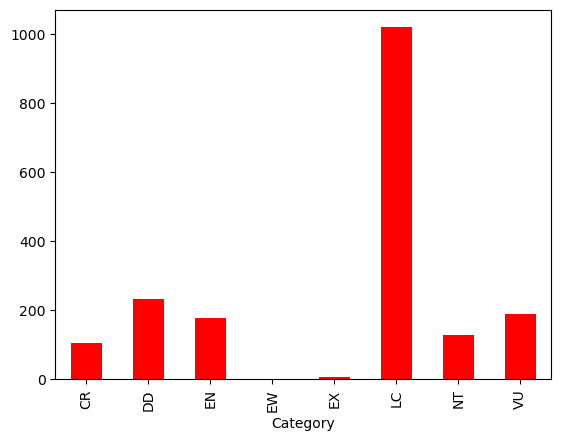

In [72]:
#IUCN categories = DD:Data Deficient, LC:Least Concern, NT:Near Threatened, VU:Vulnerable, EN:Endangered
#CR:Critically Endangered, EW: Extinct in the wild, EX:Extinct, NE:Not Evaluated
fish_category_count = fish_data_one.groupby('Category').count()
category_count_p = fish_category_count['ID_Num'].plot(kind= 'bar', color= 'r')
#Frequency of category for all FW fish

In [73]:
fish_data_two = fish_data.rename(columns={'id_no': 'ID_Num',
                            'sci_name': 'Sci Name',
                             'category': 'Category',
                             'latitude': 'Latitude',
                             'longitude': 'Longitude',
                                          'order_': 'Order',
                                     })

In [74]:
#Total fresh water fish calculations

In [75]:
#SILURIFORMES=Cat fish
#PERCIFORMES= Perch
#Grouping by order to seperate the two I want to compare
order_category_count = fish_data_two.groupby('Order').count()
#order_cate_p = order_category_count['ID_Num'].plot(kind= 'bar')

In [76]:
#Calculations for Cat fish
Cat_fish = fish_data_two[fish_data_two['Order'].isin(['SILURIFORMES'])]
Cat_fish_total = Cat_fish['ID_Num'].nunique()

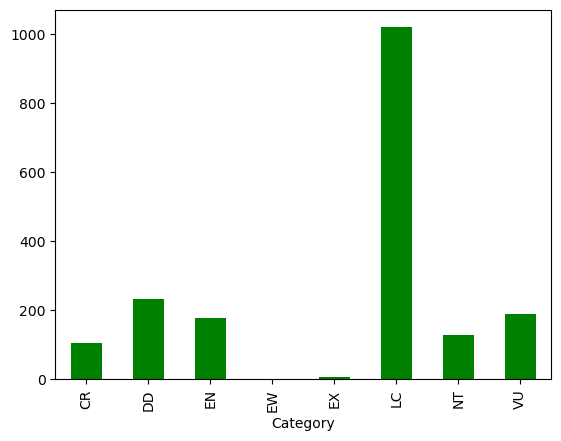

In [77]:
#plotting frequency of category for all cat fish species
Cat_fish_Count = fish_data_two.groupby('Category').count()
Cat_fish_C_plot = Cat_fish_Count['ID_Num'].plot(kind= 'bar', color='g')

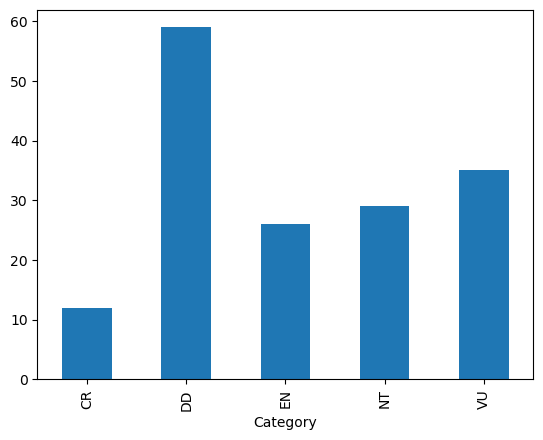

In [78]:
#Dropping LC for a better understanding of the smaller values
Cat_fish_no_LC = Cat_fish[~Cat_fish['Category'].isin(['LC'])]
Cat_fish_Count_noLC = Cat_fish_no_LC.groupby('Category').count()
Cat_fish_noLC_plot = Cat_fish_Count_noLC['ID_Num'].plot(kind= 'bar')


KeyError: 'Category'

In [80]:
# % of catfish in the CR category
Cat_fish_CR = Cat_fish[Cat_fish['Category'].isin(['CR'])]
CR_total = Cat_fish_CR['ID_Num'].nunique()
print((CR_total/Cat_fish_total)*100)

3.0927835051546393


In [81]:
# % of catfish in the EN category
Cat_fish_EN = Cat_fish[Cat_fish['Category'].isin(['EN'])]
EN_total = Cat_fish_EN['ID_Num'].nunique()
print((EN_total/Cat_fish_total)*100)

6.701030927835052


In [82]:
# % of catfish in the VU category
Cat_fish_VU = Cat_fish[Cat_fish['Category'].isin(['VU'])]
VU_total = Cat_fish_VU['ID_Num'].nunique()
print((VU_total/Cat_fish_total)*100)

9.02061855670103


In [83]:
Cat_fish_danger = pd.concat([Cat_fish_CR, Cat_fish_EN, Cat_fish_VU])
Cat_fish_danger

,objectid,ID_Num,Sci Name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,...,legend,kingdom,phylum,class,Order,family,genus,Category,Latitude,Longitude
4986,901048,19455,Rhamdia reddelli,1,1,1,Arroyave,2018,IUCN Freshwater Biodiversity Unit,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,SILURIFORMES,HEPTAPTERIDAE,Rhamdia,CR,18.446888,-96.635000
6032,1171078,118044360,Rhamdia guasarensis,1,1,1,"Echevarría, G.",2017,IUCN (International Union for Conservation of ...,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,SILURIFORMES,HEPTAPTERIDAE,Rhamdia,CR,10.881400,-72.500801
7303,1391846,60856,Bagrus meridionalis,1,1,1,IUCN Freshwater Biodiversity Unit,2019,IUCN (International Union for Conservation of ...,,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,SILURIFORMES,BAGRIDAE,Bagrus,CR,-14.283333,35.150000
78566,6740197,173832004,Hypostomus yaku,1,1,1,"Lyons, T.",2020,New Mexico BioPark Society,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,SILURIFORMES,LORICARIIDAE,Hypostomus,CR,-17.775556,-48.765556
78730,6740364,173831880,Harttia villasboas,1,1,1,"Lyons, T.",2020,New Mexico BioPark Society,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,SILURIFORMES,LORICARIIDAE,Harttia,CR,-8.735833,-54.962778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83338,6933546,176145706,Tatia meesi,1,1,1,"Calegari, B.B.",2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,SILURIFORMES,AUCHENIPTERIDAE,Tatia,VU,5.416670,-59.516701
85958,6936170,176461812,Rhamdella cainguae,1,1,1,Jorge Liotta,2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,SILURIFORMES,HEPTAPTERIDAE,Rhamdella,VU,-27.166667,-54.950000
88227,6940846,176460856,Heptapterus mbya,1,1,1,Jorge Liotta,2020,IUCN (International Union for Conservation of ...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,SILURIFORMES,HEPTAPTERIDAE,Heptapterus,VU,-27.083333,-54.950000
94396,7293667,176011871,Pimelodella linami,1,1,1,"Herrera-Collazos, E.E.",2020,SiB Colombia; GBIF; FishNet2; speciesLink; CZU...,NaN,...,Extant (resident),ANIMALIA,CHORDATA,ACTINOPTERYGII,SILURIFORMES,HEPTAPTERIDAE,Pimelodella,VU,3.350000,-73.590000


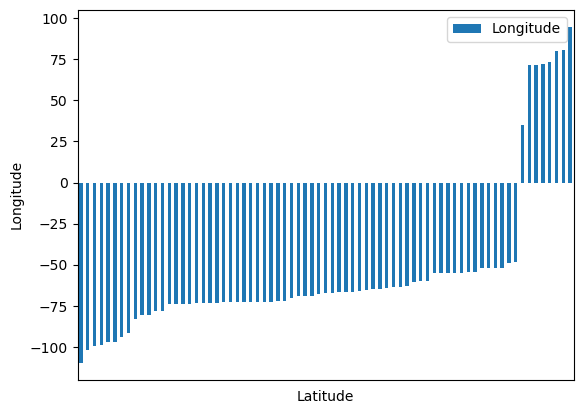

In [84]:
#Sorting the data by latitude and creating a bar plot to visualize 

CR_lat = Cat_fish_danger.sort_values('Longitude')
CR_lat = Cat_fish_danger.drop(columns=['objectid', 'ID_Num',
       'presence', 'origin', 'seasonal', 'yrcompiled',
                              'event_year','Latitude'
                             ])
CR_lat_sorted = CR_lat.sort_values('Longitude', ascending=True)
CR_lat_sorted.plot(kind='bar', xlabel='Latitude', ylabel='Longitude')
ax = plt.gca()
ax.set_xticks([])
plt.show()

In [85]:
import requests
import json
from config import geoapify_key
import hvplot.pandas
import pandas as pd
import cartopy.crs as ccrs
import geoviews as gv # noqa
import pyproj

In [86]:
#Getting lattitude for mapping 
Latitude = []

for index, row in Cat_fish_danger.iterrows():
    Latitude.append(row['Latitude'])
Latitude_df = pd.DataFrame(Latitude)
Latitude_df

,0
0,18.446888
1,10.881400
2,-14.283333
3,-17.775556
4,-8.735833
...,...
68,5.416670
69,-27.166667
70,-27.083333
71,3.350000


In [87]:
#Getting Longitude for mapping 
Longitude = []

for index, row in Cat_fish_danger.iterrows():
    Longitude.append(row['Longitude'])
Longitude_df = pd.DataFrame(Longitude)
Longitude_df

,0
0,-96.635000
1,-72.500801
2,35.150000
3,-48.765556
4,-54.962778
...,...
68,-59.516701
69,-54.950000
70,-54.950000
71,-73.590000


In [42]:
#Dictionary for coords
coordinates = {
    "latitude": [Latitude],
    "longitude": [Longitude],
}

In [43]:
cat_fish_coords = Cat_fish_danger.drop(columns=['objectid','ID_Num','presence','origin','seasonal','yrcompiled','event_year',
                                'Sci Name','compiler','citation','subspecies','subpop','source','basisofrec',
                                  'catalog_no', 'dist_comm','island','tax_comm','legend','kingdom','phylum','class','Order','family','genus',           
                             ])
cat_fish_coords

,Category,Latitude,Longitude
4986,CR,18.446888,-96.635000
6032,CR,10.881400,-72.500801
7303,CR,-14.283333,35.150000
78566,CR,-17.775556,-48.765556
78730,CR,-8.735833,-54.962778
...,...,...,...
83338,VU,5.416670,-59.516701
85958,VU,-27.166667,-54.950000
88227,VU,-27.083333,-54.950000
94396,VU,3.350000,-73.590000


:Overlay
   .Tiles.I :Tiles   [x,y]
   .Curve.I :Curve   [Longitude]   (Latitude)

In [63]:
# Configure the map plot_2
cat_fish_coords.hvplot('Longitude', 'Latitude',geo=True, tiles=True)
map_plot_danger = cat_fish_coords.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    color = 'red',
    type ='material',
    icon = 'cloud',
    icontype = 'awesome',
)

# Display the map plot
map_plot_danger

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [52]:
# Configure the map plot_2
Cat_fish_CR_ = cat_fish_coords[cat_fish_coords['Category'].isin(['CR'])]
cat_fish_cr_coords = Cat_fish_CR_.hvplot('Longitude', 'Latitude',geo=True, tiles=True)
map_plot_CR = Cat_fish_CR_.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    color = 'red'
)

# Display the map plot
map_plot_CR

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [59]:
# Configure the map plot_2
Cat_fish_EN_ = cat_fish_coords[cat_fish_coords['Category'].isin(['EN'])]
cat_fish_EN_coords = Cat_fish_EN_.hvplot('Longitude', 'Latitude',geo=True, tiles=True)
map_plot_EN = Cat_fish_EN_.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    color = 'b'
)

# Display the map plot
map_plot_EN

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

In [55]:
# Configure the map plot_2
Cat_fish_VU_ = cat_fish_coords[cat_fish_coords['Category'].isin(['VU'])]
cat_fish_VU_coords = Cat_fish_VU_.hvplot('Longitude', 'Latitude',geo=True, tiles=True)
map_plot_VU = Cat_fish_VU_.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    color = 'green'
)

# Display the map plot
map_plot_CR

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]